# Задание 1

In [10]:
import numpy as np
from datetime import datetime, timedelta
EPOCH = datetime(1970, 1, 1)

dt = np.dtype({'names': ['name', 'height', 'first_ascent',
                         'first_winter_ascent', 'latitude', 'longitude'],
               'formats': ['|S13', 'u2', 'f8', 'f8', 'f8', 'f8']
              })

def angle_str_to_float(s):
    """
    Convert an angle given in degrees, D, minutes, M, and seconds, S as a
    string 'DdMdSs' in to a float representing decimal degrees.
    """

    d, rem = s.split('d')
    m, rem = rem.split('m')
    s, rem = rem.split('s')
    return float(d) + float(m)/60 + float(s)/3600

def angle_float_to_str(abs_angle):
    """
    Convert a float representing an angle in degrees to a string of the form
    'DdMdSs' representing degrees, D, minutes, M, and seconds, S.

    """

    d = int(abs_angle)
    fmins = (abs_angle - d) * 60
    m = int(fmins)
    s = int(round((fmins - m) * 60))
    return '{D:d}d{M:d}m{S:d}s'.format(D=d, M=m, S=s)

def longlat_str_to_float(s):
    """
    Convert a longitude or latitude given as a string 'DdMmSsZ' (Z=N, E, S or W)
    into a float representing decimal degrees.

    """

    sgn = {'N': 1, 'E': 1, 'S': -1, 'W': -1}
    return sgn[s[-1]] * angle_str_to_float(s[:-1])


def latitude_float_to_str(angle):
    """
    Convert a latitude as a float between -90 and 90 degrees into a string
    giving degrees, minutes and seconds: 'DdMmSsZ' (Z=N or S).

    """

    hemisphere = 'N' if angle >=0 else 'S'
    return angle_float_to_str(abs(angle)) + hemisphere

def longitude_float_to_str(angle):
    """
    Convert a longitude as a float between -180 and 180 degrees into a string
    giving degrees, minutes and seconds: 'DdMmSsZ' (Z=E or W).

    """

    hemisphere = 'E' if angle >=0 else 'W'
    return angle_float_to_str(abs(angle)) + hemisphere

def date_str_to_float(s):
    """
    Converts a date represented as string formatted 'DD/MM/YYYY' to a number
    of seconds since "the epoch" (1/1/1970).
    """

    return (datetime.strptime(s, '%d/%m/%Y') -
                            EPOCH).total_seconds()
def date_float_to_str(t):
    """
    Convert a time in seconds since the epoch to a string formatted
    'DD/MM/YYYY'

    """

    return datetime.strftime((EPOCH + timedelta(seconds=t)), '%d/%m/%Y')


In [11]:
peaks = np.genfromtxt('ex6-2-b-mountain-data.txt', dtype=dt, skip_header=12,
            converters={2: date_str_to_float,
                        3: date_str_to_float,
                        4: longlat_str_to_float,
                        5: longlat_str_to_float},
            delimiter=(13,5,14,12,13,11), skip_footer=1, autostrip=True)

ilowest = np.argmin(peaks['height'])
print('The lowest 8000 m peak is {:s} at {:4d} m'.format(
              peaks[ilowest]['name'].decode('utf-8'), peaks[ilowest]['height']))

peaks.sort(order='latitude')
print('The most Northerly peak is {:s} at {:s} deg North'.format(
            peaks[-1]['name'].decode('utf-8'),
            latitude_float_to_str(peaks[-1]['latitude'])))
print('The most Southerly peak is {:s} at {:s} deg North'.format(
            peaks[0]['name'].decode('utf-8'),
            latitude_float_to_str(peaks[0]['latitude'])))

peaks.sort(order='longitude')
print('The most Easterly peak is {:s} at {:s} deg East'.format(
            peaks[-1]['name'].decode('utf-8'),
            longitude_float_to_str(peaks[-1]['longitude'])))
print('The most Westerly peak is {:s} at {:s} deg East'.format(
            peaks[0]['name'].decode('utf-8'),
            longitude_float_to_str(peaks[0]['longitude'])))

peaks.sort(order='first_ascent')
print('Most recent first ascent: {:s} on {:s}'.format(
        peaks[-1]['name'].decode('utf-8'),
        date_float_to_str(peaks[-1]['first_ascent'])))

i = np.nanargmax(peaks['first_winter_ascent'])
print('Most recent first winter ascent: {:s} on {:s}'.format(
    peaks[i]['name'].decode('utf-8'),
    date_float_to_str(peaks[i]['first_winter_ascent'])))


dt2 = np.dtype({'names': ['name', 'height', 'first_ascent'],
                'formats': ['|S13', 'u2', '|S10']})
ordered_peaks = np.zeros(len(peaks), dtype=dt2)
ordered_peaks['name'] = peaks['name']
ordered_peaks['height'] = peaks['height'] * 3.2808399
ordered_peaks['first_ascent'] = [date_float_to_str(t) 
                                    for t in peaks['first_ascent']]
ordered_peaks = np.sort(ordered_peaks, order='height')[::-1]

print('+---------------+------------+--------------+')
print('| Peak          | height /ft | first ascent |')
print('+---------------+------------+--------------+')
for peak, height, first_ascent in ordered_peaks:
        print('| {:13s} | {:^10d} | {:^12s} |'.format(
            peak.decode('utf-8'), height, first_ascent.decode('utf-8')))
print('+---------------+------------+--------------+')

The lowest 8000 m peak is Shishapangma at 8027 m
The most Northerly peak is K2 at 35d52m57sN deg North
The most Southerly peak is Kangchenjunga at 27d42m9sN deg North
The most Easterly peak is Kangchenjunga at 88d8m54sE deg East
The most Westerly peak is Nanga Parbat at 74d35m21sE deg East
Most recent first ascent: Shishapangma on 02/05/1964
Most recent first winter ascent: Nanga Parbat on 16/02/2016
+---------------+------------+--------------+
| Peak          | height /ft | first ascent |
+---------------+------------+--------------+
| Everest       |   29028    |  29/05/1953  |
| K2            |   28251    |  31/07/1954  |
| Kangchenjunga |   28110    |  25/05/1955  |
| Lhotse        |   27939    |  18/05/1956  |
| Makalu        |   27837    |  15/05/1955  |
| Cho Oyu       |   26906    |  19/10/1954  |
| Dhaulagiri I  |   26794    |  13/05/1960  |
| Manaslu       |   26781    |  09/05/1956  |
| Nanga Parbat  |   26660    |  03/07/1953  |
| Gasherbrum I  |   26509    |  05/07/1958  

# Задание 2

In [16]:

import sys
import numpy as np

haversin = lambda alpha: np.sin(alpha/2)**2
def gc_distance(airport_coords1, airport_coords2):
    """
    Return the great-circle distance between two coordinates on the Earth
    provided as two (latitude, longitude) tuples in radians.

    """

    # Earth's radius, km
    R = 6378.1
    (phi1, lambda1), (phi2, lambda2) = airport_coords1, airport_coords2
    d = 2 * R * np.arcsin(np.sqrt(haversin(phi2-phi1)
                + np.cos(phi1)*np.cos(phi2)*haversin(lambda2-lambda1)))
    return d

iata1, iata2 = sys.argv[1:]

dt = np.dtype([('IATA', 'S50'), ('Name', 'S50'), ('Location', 'S50'),
               ('Latitude', 'f8'), ('Longitude', 'f8')])

to_radians = lambda alpha: np.radians(float(alpha))
airports = np.loadtxt('busiest_airports.txt', dtype=dt, delimiter='\t',
                      converters={3: to_radians, 4: to_radians})

def get_airport(iata):
    """
    Return the airport with IATA code iata from the airports array or
    raise an Exception if it isn't recognised.

    """

    b_iata = bytes(iata, encoding='ascii')
    airport = airports[airports['IATA']==b_iata]
    # check we retrieved an airport: NB we can't use assert airport, ...
    # because of a bug in numpy versions older than 1.8
    assert len(airport)==1, 'Airport not recognised: {:s}'.format(iata)
    return airport
iata1 = "SFO"
iata2 = "LHR"
airport1 = get_airport("SFO")
airport2 = get_airport("LHR")
airport_coords1 = airport1[['Latitude','Longitude']][0]
airport_coords2 = airport2[['Latitude','Longitude']][0]
airport_name1 = airport1['Name'][0].decode()
airport_name2 = airport2['Name'][0].decode()
d = gc_distance(airport_coords1, airport_coords2)

print('Distance from {:s} ({:3s}) to {:s} ({:3s}) is {:d} km'.format(
        airport_name1, iata1, airport_name2, iata2, int(d)))

Distance from San Francisco International Airport (SFO) to London Heathrow Airport (LHR) is 8625 km


# Задание 3

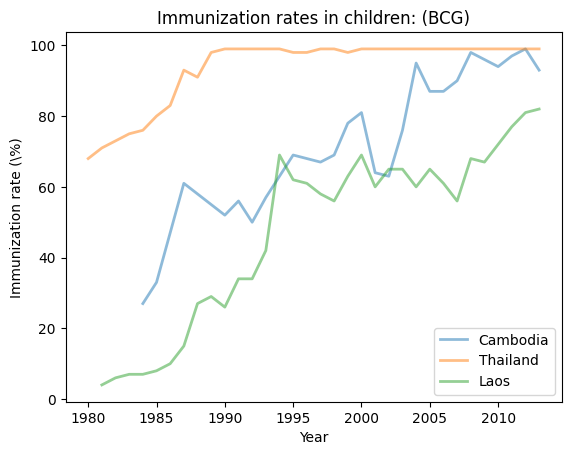

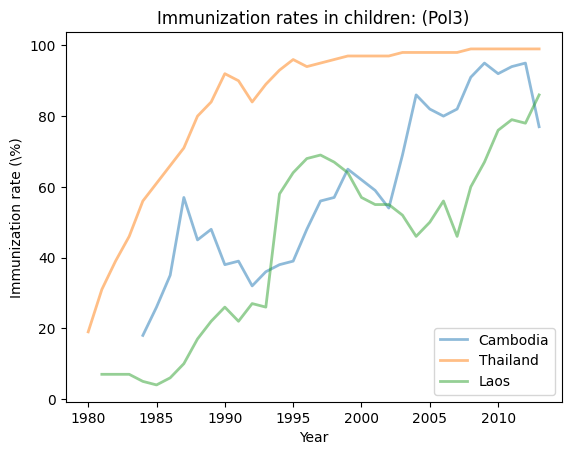

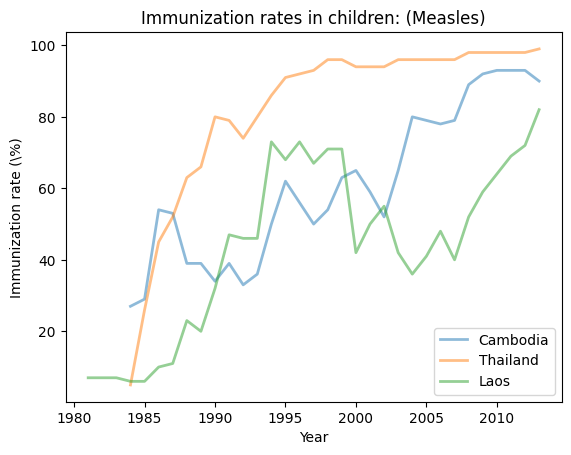

In [18]:
import numpy as np
import pylab

filename = 'wb-data.dat'
data = np.genfromtxt(filename, skip_header=1, missing_values='..', delimiter=';')
years = np.linspace(1960, 2013, 54).astype(int)
cambodia_data, thailand_data, laos_data = data[:3], data[3:6], data[6:]

def plot_data(data, vaccine):
    pylab.plot(years, data[0,4:], lw=2, alpha=0.5, label='Cambodia')
    pylab.plot(years, data[1,4:], lw=2, alpha=0.5, label='Thailand')
    pylab.plot(years, data[2,4:], lw=2, alpha=0.5, label='Laos')
    pylab.xlabel('Year')
    pylab.ylabel(r'Immunization rate (\%)')
    pylab.title('Immunization rates in children: ({})'.format(vaccine))
    pylab.legend(loc=4)
    pylab.show()

plot_data(data[::3], 'BCG')
plot_data(data[1::3], 'Pol3')
plot_data(data[2::3], 'Measles')